<a href="https://colab.research.google.com/github/kiruba-285/CODSOFT/blob/main/Movie_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install scikit-learn -U
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
!pip install wordcloud
from wordcloud import WordCloud
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 29.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


Load the train data


In [3]:
train_dt = pd.read_csv('/content/train_data.txt', delimiter=':::', engine='python',names=['ID','TITLE','GENRE','DESCRIPTION'])

In [4]:
train_dt

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...,...
49733,49734,"""Heirs from another star"" (2014)",romance,Heirs From Another Star is a Chinese parody f...
49734,49735,Dean Kamen (2002),documentary,Profile of the legendary inventor as he prepa...
49735,49736,Alive (2013),drama,"The ALIVE special tells the story of Liv, a s..."
49736,49737,Life Support (2007),drama,"In Brooklyn, New York, the former crack addic..."


In [5]:
train_dt.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


Load the test data

In [6]:
test_dt = pd.read_csv('/content/test_data.txt',delimiter=':::', engine='python',names=['ID','TITLE','GENRE','DESCRIPTION'])

In [7]:
test_dt

,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",NaN
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",NaN
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,NaN
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",NaN
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,NaN
...,...,...,...,...
52339,52340,Fridays (2009),"Reza, an Iranian man, visits his daughter and...",NaN
52340,52341,Undeva la Palilula (2012),"""Somewhere in Palilula"" tells the story of Se...",NaN
52341,52342,Oass (2012),"Eyes forward, Kiku hurtles down the street. A...",NaN
52342,52343,"""Married to Medicine Houston"" (2016)",The hardworking doctors and doctors wives str...,NaN


In [8]:
test_dt.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",NaN
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",NaN
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,NaN
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",NaN
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,NaN


Load the test_data_solution

In [9]:
test_dt_solution = pd.read_csv('/content/test_data_solution.txt',delimiter=':::', engine='python',names=['ID','TITLE','GENRE','DESCRIPTION'])

In [10]:
test_dt_solution

,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...
...,...,...,...,...
43365,43366,Living Life Forwards: Culture and Sustainable...,documentary,"British writer and host, Leszek Burzynski, ch..."
43366,43367,Boxford Masques: Joe Soap's Masquerade (2014),comedy,"The Great War has kept ""Lad Helpful"" and her ..."
43367,43368,Reprisal (????),crime,A scrupulously honest prosecutor is blackball...
43368,43369,Ambre: A Heartbreaking Kinetic Novel (2017),drama,"As he is passing by a park, a depressed thirt..."


In [11]:
test_dt_solution.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [12]:
print(train_dt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49738 entries, 0 to 49737
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           49738 non-null  int64 
 1   TITLE        49738 non-null  object
 2   GENRE        49738 non-null  object
 3   DESCRIPTION  49738 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.5+ MB
None


In [13]:
print(test_dt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52344 entries, 0 to 52343
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           52344 non-null  int64  
 1   TITLE        52344 non-null  object 
 2   GENRE        52344 non-null  object 
 3   DESCRIPTION  0 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.6+ MB
None


In [14]:
print(train_dt.isnull().sum())

ID             0
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64


In [15]:
print(test_dt.isnull().sum())

ID                 0
TITLE              0
GENRE              0
DESCRIPTION    52344
dtype: int64


In [16]:
print(test_dt_solution.isnull().sum())

ID             0
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64


In [17]:
#Add a new column for the length of description
train_dt['Desc_LENGTH'] = train_dt['DESCRIPTION'].apply(lambda x: len(x.split()))

In [18]:
train_dt


,ID,TITLE,GENRE,DESCRIPTION,Desc_LENGTH
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,92
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,32
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,114
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,192
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,106
...,...,...,...,...,...
49733,49734,"""Heirs from another star"" (2014)",romance,Heirs From Another Star is a Chinese parody f...,74
49734,49735,Dean Kamen (2002),documentary,Profile of the legendary inventor as he prepa...,43
49735,49736,Alive (2013),drama,"The ALIVE special tells the story of Liv, a s...",62
49736,49737,Life Support (2007),drama,"In Brooklyn, New York, the former crack addic...",135


Plot the distribution of description lengths

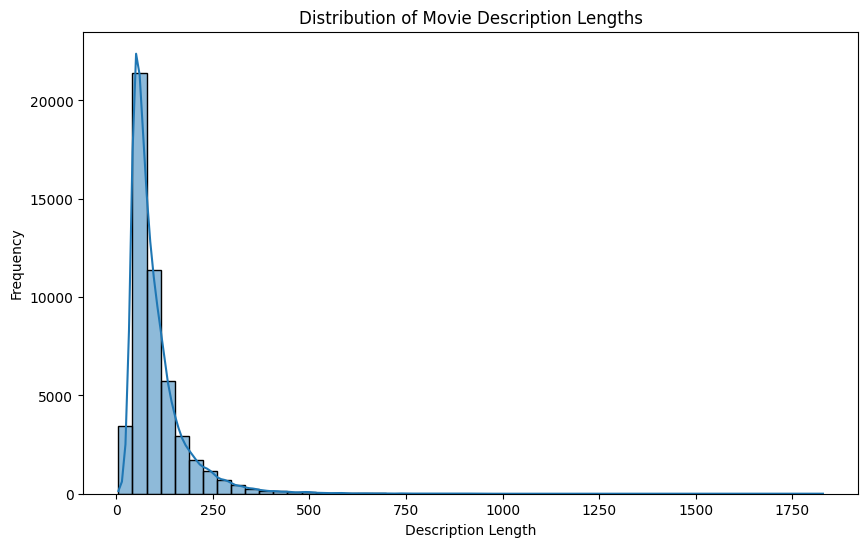

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(train_dt['Desc_LENGTH'],bins=50,kde=True)
plt.xlabel('Description Length')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Description Lengths')
plt.show()

In [20]:
#List all unique genres in the dataset
unique_genres = train_dt['GENRE'].unique()
print(unique_genres)

[' drama ' ' thriller ' ' adult ' ' documentary ' ' comedy ' ' crime '
 ' reality-tv ' ' horror ' ' sport ' ' animation ' ' action ' ' fantasy '
 ' short ' ' sci-fi ' ' music ' ' adventure ' ' talk-show ' ' western '
 ' family ' ' mystery ' ' history ' ' news ' ' biography ' ' romance '
 ' game-show ' ' musical ' ' war ']


Distribution of Genres

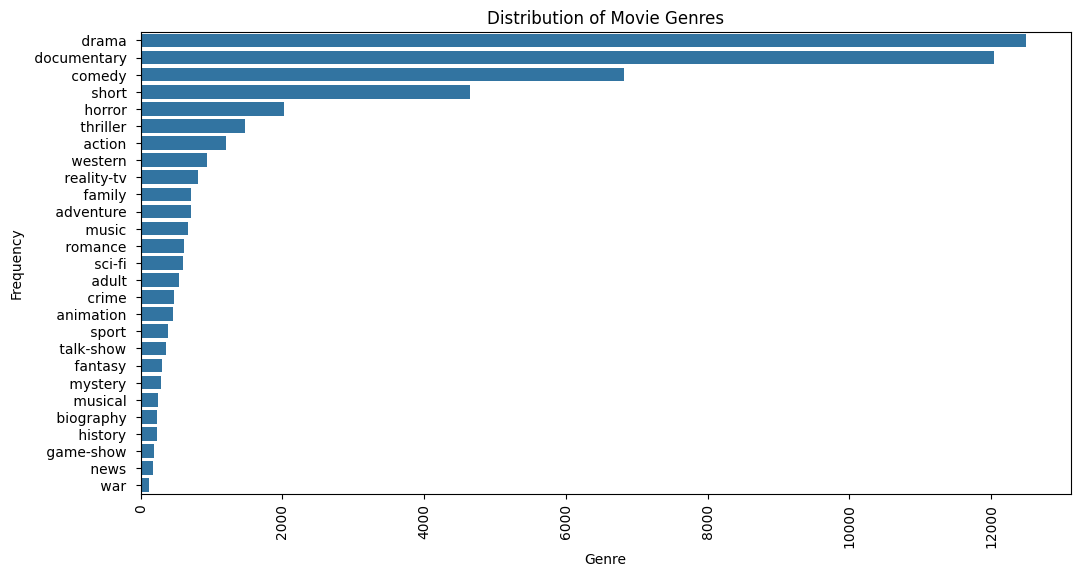

In [21]:
#plot the distribution of genres
plt.figure(figsize=(12,6))
sns.countplot(y='GENRE',data=train_dt, order =train_dt['GENRE'].value_counts().index)
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Genres')
plt.xticks(rotation=90)
plt.show()

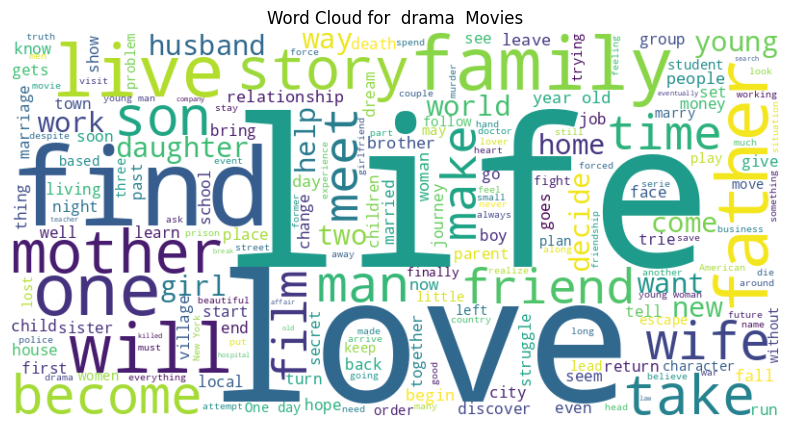

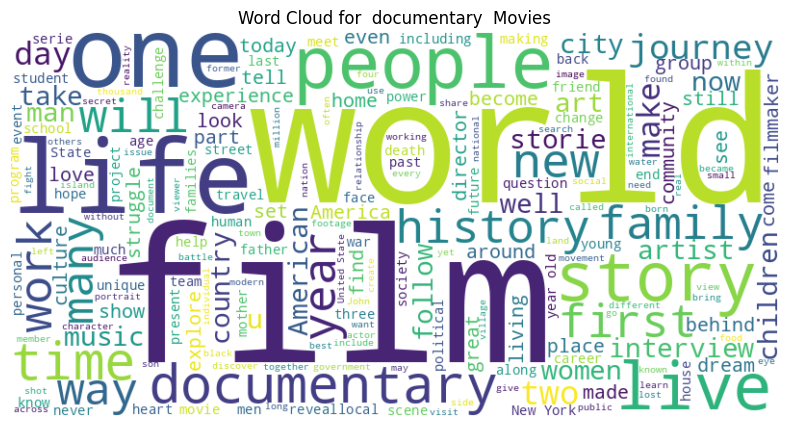

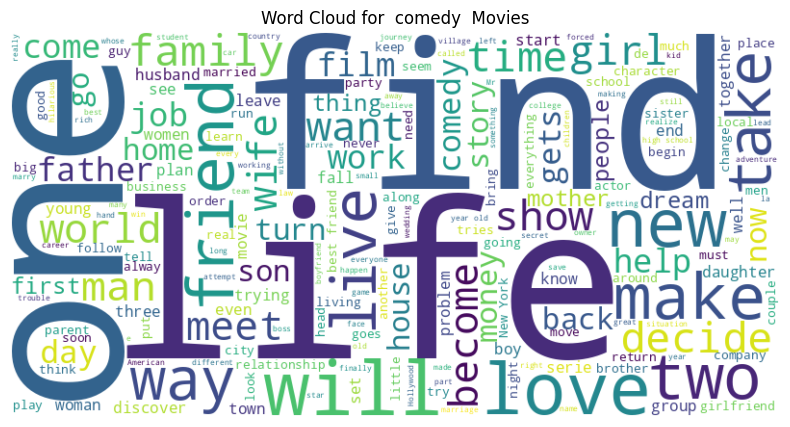

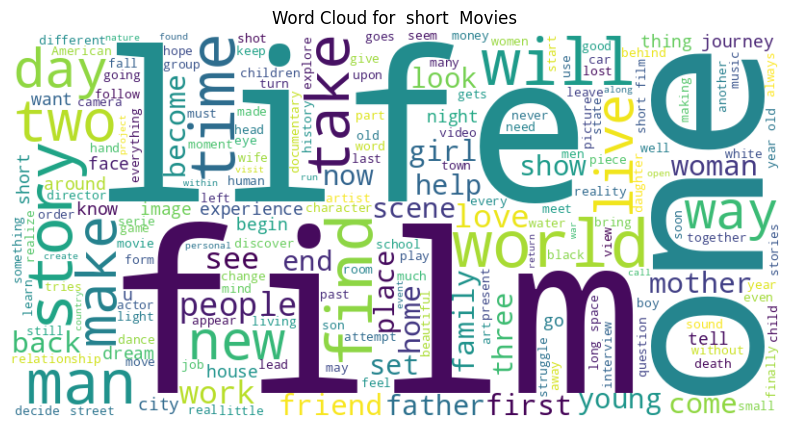

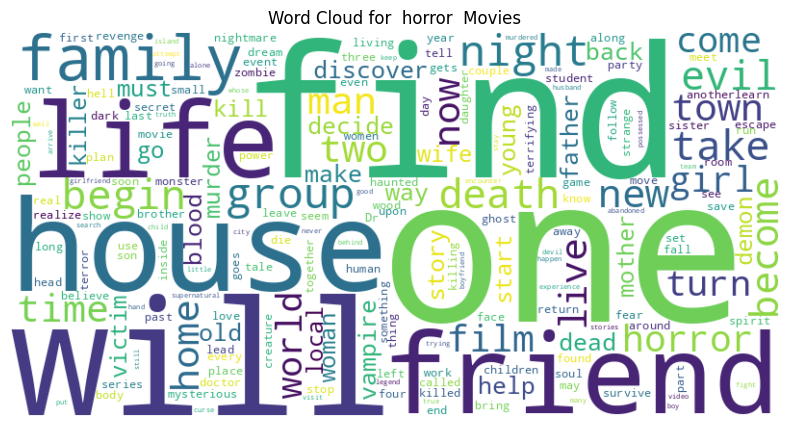

In [22]:
#To Identify the top 5 most frequent genres
top_genres = train_dt['GENRE'].value_counts().head(5).index
#Generate word clouds
for genre in top_genres:
  subset = train_dt[train_dt['GENRE'] == genre]
  text = ' '.join(subset['DESCRIPTION'])
  wordcloud = WordCloud(width=800,height=400,background_color='white').generate(' '.join(subset['DESCRIPTION']))
  plt.figure(figsize=(10,5))
  plt.imshow(wordcloud,interpolation='bilinear')
  plt.axis('off')
  plt.title(f'Word Cloud for {genre} Movies')
  plt.show

Data Preprocessing and Splitting

In [23]:
import re
from nltk.corpus import stopwords # import the stopwords object from nltk.corpus
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer

def preprocess_text(text):
  text = text.lower()
  text = re.sub(r'\d+','',text)
  text = re.sub(r'[^\w\s]','',text)
  stop_words = set(stopwords.words('english'))
  text = ' '.join(word for word in text.split() if word not in stop_words)
  lemmatizer = WordNetLemmatizer()
  text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())
  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [24]:
tfid_vectorizer = TfidfVectorizer(stop_words = "english" , max_features = 100000)

In [25]:
X_train = tfid_vectorizer.fit_transform(train_dt['DESCRIPTION'])

In [26]:
# Convert the 'DESCRIPTION' column to string type before applying fit_transform
X_test = tfid_vectorizer.fit_transform(test_dt['DESCRIPTION'].astype(str))

In [27]:
#Encode the target labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(train_dt['GENRE'])


In [28]:
X_train_split,X_val_split,y_train_split,y_val_split = train_test_split(X_train,y_train,test_size=0.2,random_state=42)

In [29]:
#Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train_split,y_train_split)
nb_predictions = nb_model.predict(X_val_split)

In [30]:
y_val_pred_nb = nb_model.predict(X_val_split)
print("Naive Bayes model Evaluation")
print(classification_report(y_val_split,y_val_pred_nb,target_names = encoder.classes_))
print(f"Accuracy: {accuracy_score(y_val_split,y_val_pred_nb): .4f}\n")


Naive Bayes model Evaluation
               precision    recall  f1-score   support

      action        0.00      0.00      0.00       232
       adult        0.00      0.00      0.00        94
   adventure        0.00      0.00      0.00       137
   animation        0.00      0.00      0.00        90
   biography        0.00      0.00      0.00        45
      comedy        0.71      0.05      0.10      1379
       crime        0.00      0.00      0.00       101
 documentary        0.53      0.91      0.67      2409
       drama        0.38      0.88      0.53      2465
      family        0.00      0.00      0.00       138
     fantasy        0.00      0.00      0.00        52
   game-show        0.00      0.00      0.00        38
     history        0.00      0.00      0.00        49
      horror        0.00      0.00      0.00       391
       music        0.00      0.00      0.00       122
     musical        0.00      0.00      0.00        46
     mystery        0.00      0.00 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Logistic Regression Model

In [31]:


# Assuming X_train_split and y_train_split are defined from your train_test_split
lr_model = LogisticRegression() # Create an instance of the LogisticRegression model
lr_model.fit(X_train_split, y_train_split) # Train the model

y_val_pred_lr = lr_model.predict(X_val_split) # Now you can use the trained model for predictions
print("Logistic Regression Model Evaluation")
print(classification_report(y_val_split,y_val_pred_lr,target_names = encoder.classes_))
print(f"Accuracy: {accuracy_score(y_val_split,y_val_pred_lr): .4f}")

Logistic Regression Model Evaluation
               precision    recall  f1-score   support

      action        0.57      0.22      0.32       232
       adult        0.76      0.14      0.23        94
   adventure        0.61      0.16      0.25       137
   animation        1.00      0.01      0.02        90
   biography        0.00      0.00      0.00        45
      comedy        0.54      0.57      0.55      1379
       crime        1.00      0.01      0.02       101
 documentary        0.65      0.87      0.74      2409
       drama        0.52      0.82      0.64      2465
      family        0.62      0.06      0.11       138
     fantasy        0.00      0.00      0.00        52
   game-show        0.94      0.42      0.58        38
     history        0.00      0.00      0.00        49
      horror        0.66      0.51      0.58       391
       music        0.59      0.33      0.42       122
     musical        0.00      0.00      0.00        46
     mystery        0.00   

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

In [32]:
#SVC Model
svc_model = LinearSVC()
svc_model.fit(X_train_split,y_train_split)

LinearSVC()

In [33]:
y_val_pred_svc = svc_model.predict(X_val_split)
print("SVC Model Evaluation")
print(classification_report(y_val_split,y_val_pred_svc,target_names = encoder.classes_))

SVC Model Evaluation
               precision    recall  f1-score   support

      action        0.47      0.34      0.40       232
       adult        0.69      0.38      0.49        94
   adventure        0.62      0.26      0.37       137
   animation        0.36      0.13      0.20        90
   biography        0.00      0.00      0.00        45
      comedy        0.52      0.58      0.55      1379
       crime        0.32      0.07      0.11       101
 documentary        0.69      0.83      0.75      2409
       drama        0.55      0.72      0.62      2465
      family        0.42      0.18      0.25       138
     fantasy        0.27      0.06      0.10        52
   game-show        0.79      0.61      0.69        38
     history        0.00      0.00      0.00        49
      horror        0.59      0.59      0.59       391
       music        0.59      0.54      0.57       122
     musical        0.20      0.02      0.04        46
     mystery        0.33      0.03      0.0

Make predictions on the test data using the support vector machine Model

In [34]:
# Initialize and train LinearSVC
model = LinearSVC()
model.fit(X_train_split, y_train_split)


LinearSVC()

In [35]:
y_val_pred_svc = model.predict(X_val_split)
print("SVC Model Evaluation")
print(classification_report(y_val_split,y_val_pred_svc,target_names = encoder.classes_))
print(f"Accuracy: {accuracy_score(y_val_split,y_val_pred_svc): .4f}")


SVC Model Evaluation
               precision    recall  f1-score   support

      action        0.47      0.34      0.40       232
       adult        0.69      0.38      0.49        94
   adventure        0.62      0.26      0.37       137
   animation        0.36      0.13      0.20        90
   biography        0.00      0.00      0.00        45
      comedy        0.52      0.58      0.55      1379
       crime        0.32      0.07      0.11       101
 documentary        0.69      0.83      0.75      2409
       drama        0.55      0.72      0.62      2465
      family        0.42      0.18      0.25       138
     fantasy        0.27      0.06      0.10        52
   game-show        0.79      0.61      0.69        38
     history        0.00      0.00      0.00        49
      horror        0.59      0.59      0.59       391
       music        0.59      0.54      0.57       122
     musical        0.20      0.02      0.04        46
     mystery        0.33      0.03      0.0

Make prediction on the test data using support vector Machine


In [48]:
# Check if the model is fitted
if not hasattr(model, "coef_"):
    print("Model not fitted. Fitting now...")
    model.fit(X_train_split, y_train_split)




In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer
vectorizer = TfidfVectorizer(max_features=100000)

# Fit the vectorizer on the training data and transform it
X_train_split = vectorizer.fit_transform(train_dt)

# Transform the test data using the same vectorizer
X_test = vectorizer.transform(test_dt)


In [55]:


# Example data (replace with your actual training and test data)
X_train = ["This is a sample sentence.", "Another sample sentence for training."]
X_test = ["This is a test sentence.", "Another example for testing."]
y_train = ['genre1', 'genre2']  # Example labels

# Step 1: Fit the vectorizer on the training data
vectorizer = TfidfVectorizer(max_features=100000)
X_train_tfidf = vectorizer.fit_transform(X_train)  # Fit and transform training data

# Step 2: Train the SVM model
svc_model = LinearSVC()
svc_model.fit(X_train_tfidf, y_train)

# Step 3: Transform the test data using the same vectorizer
X_test_tfidf = vectorizer.transform(X_test)  # Transform test data

# Step 4: Make predictions
y_test_pred = svc_model.predict(X_test_tfidf)

# Output predictions
print("Predicted genres:", y_test_pred)


Predicted genres: ['genre1' 'genre2']


In [58]:
test_data_solution = pd.read_csv('/content/test_data_solution.txt',delimiter=':::', engine='python',names=['ID','TITLE','GENRE','DESCRIPTION'])

In [59]:
test_data_solution

,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...
...,...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)",horror,"Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner (1965),western,As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink (2007),adult,A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),drama,"Popular, but mysterious rock D.J Mike Mallard..."


In [60]:
new_des = ("National Geographis views jack horner's research into juvinile dinousaurs")

In [10]:
!pip install pandas
!pip install scikit-learn

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

# Example data (replace with your actual training and test data)
X_train = ["This is a sample sentence.", "Another sample sentence for training."]
X_test = ["This is a test sentence.", "Another example for testing."]
y_train = ['genre1', 'genre2']  # Example labels

# Step 1: Fit the vectorizer on the training data
vectorizer = TfidfVectorizer(max_features=100000) # Define vectorizer in the global scope
X_train_tfidf = vectorizer.fit_transform(X_train)  # Fit and transform training data

# Step 2: Train the SVM model
svc_model = LinearSVC()
svc_model.fit(X_train_tfidf, y_train)

# Step 3: Transform the test data using the same vectorizer
X_test_tfidf = vectorizer.transform(X_test)  # Transform test data

# Step 4: Make predictions
y_test_pred = svc_model.predict(X_test_tfidf)

# Output predictions
print("Predicted genres:", y_test_pred)

def predict_genre(description): # No need to pass vectorizer
    # Assuming svc_model and tfid_vectorizer are defined in the global scope
    # The preprocess_text function needs to be defined or imported.
    # Assuming this function was intended to lowercase the description:
    processed_des = description.lower()
    x_input = vectorizer.transform([processed_des]) # Use the globally defined vectorizer
    prediction = svc_model.predict(x_input) # Using the globally defined svc_model
    return prediction[0]

# Define new_des within the same scope as the function call
new_des = ("National Geographis views jack horner's research into juvinile dinousaurs")



Predicted genres: ['genre1' 'genre2']


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [9]:
predicted_genre = predict_genre(new_des) # No need to pass vectorizer
print("Predicted Genre:", predicted_genre)

Predicted Genre: genre2
